# Explore here

In [2]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt 

datosDiabetes = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")

datosDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
datosDiabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
datosDiabetes.shape

(768, 9)

In [5]:
datosDiabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
datosDiabetes.duplicated().sum()

np.int64(0)

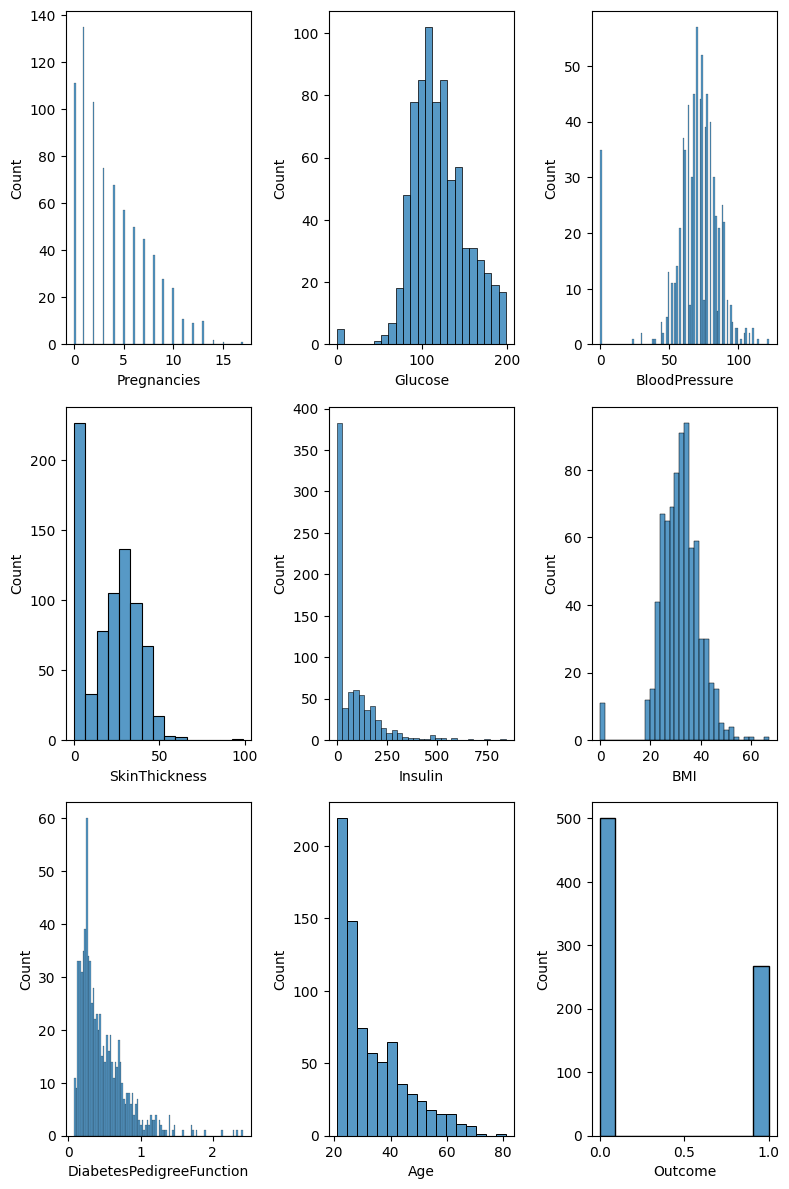

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (8, 12))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "Pregnancies",bins=100)
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "Glucose")
sns.histplot(ax = axis[0, 2], data = datosDiabetes, x = "BloodPressure",bins=100)
sns.histplot(ax = axis[1, 0], data = datosDiabetes, x = "SkinThickness")
sns.histplot(ax = axis[1, 1], data = datosDiabetes, x = "Insulin")
sns.histplot(ax = axis[1, 2], data = datosDiabetes, x = "BMI")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "DiabetesPedigreeFunction",bins=100)
sns.histplot(ax = axis[2, 1], data = datosDiabetes, x = "Age")
sns.histplot(ax = axis[2, 2], data = datosDiabetes, x = "Outcome")

plt.tight_layout()

# Mostrar el plot
plt.show()

In [8]:
datosDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


He revisado mis outliers, pero no les aplico ningun filtro a mis datos, haciendo multiples pruebas, si le aplico limites la precision al final de todo, bajaria y no seria realista esos datos.

In [9]:
Q1_Glc = datosDiabetes['Glucose'].quantile(0.25)
Q3_Glc = datosDiabetes['Glucose'].quantile(0.75)

IQR_Glc = Q3_Glc - Q1_Glc

limite_inferior_Glc = Q1_Glc - 1.5 * IQR_Glc
limite_superior_Glc = Q3_Glc + 1.5 * IQR_Glc

print(f"Limite inferior de glucosa: {limite_inferior_Glc} \nLimite superior de glucosa: {limite_superior_Glc}")

Limite inferior de glucosa: 37.125 
Limite superior de glucosa: 202.125


In [10]:
print((datosDiabetes['Glucose'] == 0).sum())
print((datosDiabetes['BloodPressure'] == 0).sum())
print((datosDiabetes['SkinThickness'] == 0).sum())
print((datosDiabetes['BMI'] == 0).sum())

5
35
227
11


In [11]:
Q1_BlP = datosDiabetes['BloodPressure'].quantile(0.25)
Q3_BlP = datosDiabetes['BloodPressure'].quantile(0.75)

IQR_BlP = Q3_BlP - Q1_BlP

limite_inferior_BlP = Q1_BlP - 1.5 * IQR_BlP
limite_superior_BlP = Q3_BlP + 1.5 * IQR_BlP

print(f"Limite inferior de Presion sanguinea: {limite_inferior_BlP} \nLimite superior de Presion sanguinea: {limite_superior_BlP}")

Limite inferior de Presion sanguinea: 35.0 
Limite superior de Presion sanguinea: 107.0


In [12]:
Q1_BlP = datosDiabetes['SkinThickness'].quantile(0.25)
Q3_BlP = datosDiabetes['SkinThickness'].quantile(0.75)

IQR_BlP = Q3_BlP - Q1_BlP

limite_inferior_BlP = Q1_BlP - 1.5 * IQR_BlP
limite_superior_BlP = Q3_BlP + 1.5 * IQR_BlP

print(f"Limite inferior de grosor de Triceps: {limite_inferior_BlP} \nLimite superior de grosor de Triceps: {limite_superior_BlP}")

Limite inferior de grosor de Triceps: -48.0 
Limite superior de grosor de Triceps: 80.0


In [13]:
Q1_BlP = datosDiabetes['BMI'].quantile(0.25)
Q3_BlP = datosDiabetes['BMI'].quantile(0.75)

IQR_BlP = Q3_BlP - Q1_BlP

limite_inferior_BlP = Q1_BlP - 1.5 * IQR_BlP
limite_superior_BlP = Q3_BlP + 1.5 * IQR_BlP

print(f"Limite inferior de BMI: {limite_inferior_BlP} \nLimite superior de BMI: {limite_superior_BlP}")

Limite inferior de BMI: 13.35 
Limite superior de BMI: 50.550000000000004


Revisando los outliers, he visto que hay valores a 0 de glucosa hay 5, Bmi hay 11 y presion arterial 35. Como maximo he aplicado un filtro como maximo quito 35 regsitros. A parte he hecho un promedio de SkinThickness, ya que habia 227 a 0, apra sea mas real la tabla, ya que 0 es todos estos campo son malos, en lo que respecta a salud.

In [14]:
promedio = datosDiabetes[datosDiabetes['SkinThickness'] != 0]['SkinThickness'].std()

# Reemplazar los 0 por el promedio calculado
datosDiabetes['SkinThickness'] = datosDiabetes['SkinThickness'].replace(0, promedio)

In [15]:
datosDiabetes = datosDiabetes[(datosDiabetes['Glucose'] >= 37) & (datosDiabetes['BloodPressure'] >= 35) & (datosDiabetes['BMI'] != 0)]

In [16]:
datosDiabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,3.877947,122.001387,72.585298,24.185271,84.558946,32.427323,0.475024,33.378641,0.343967
std,3.364698,30.755465,12.067231,12.226944,117.237803,6.837780,0.332813,11.777664,0.475360
min,0.000000,44.000000,38.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,10.476982,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.378000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,132.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


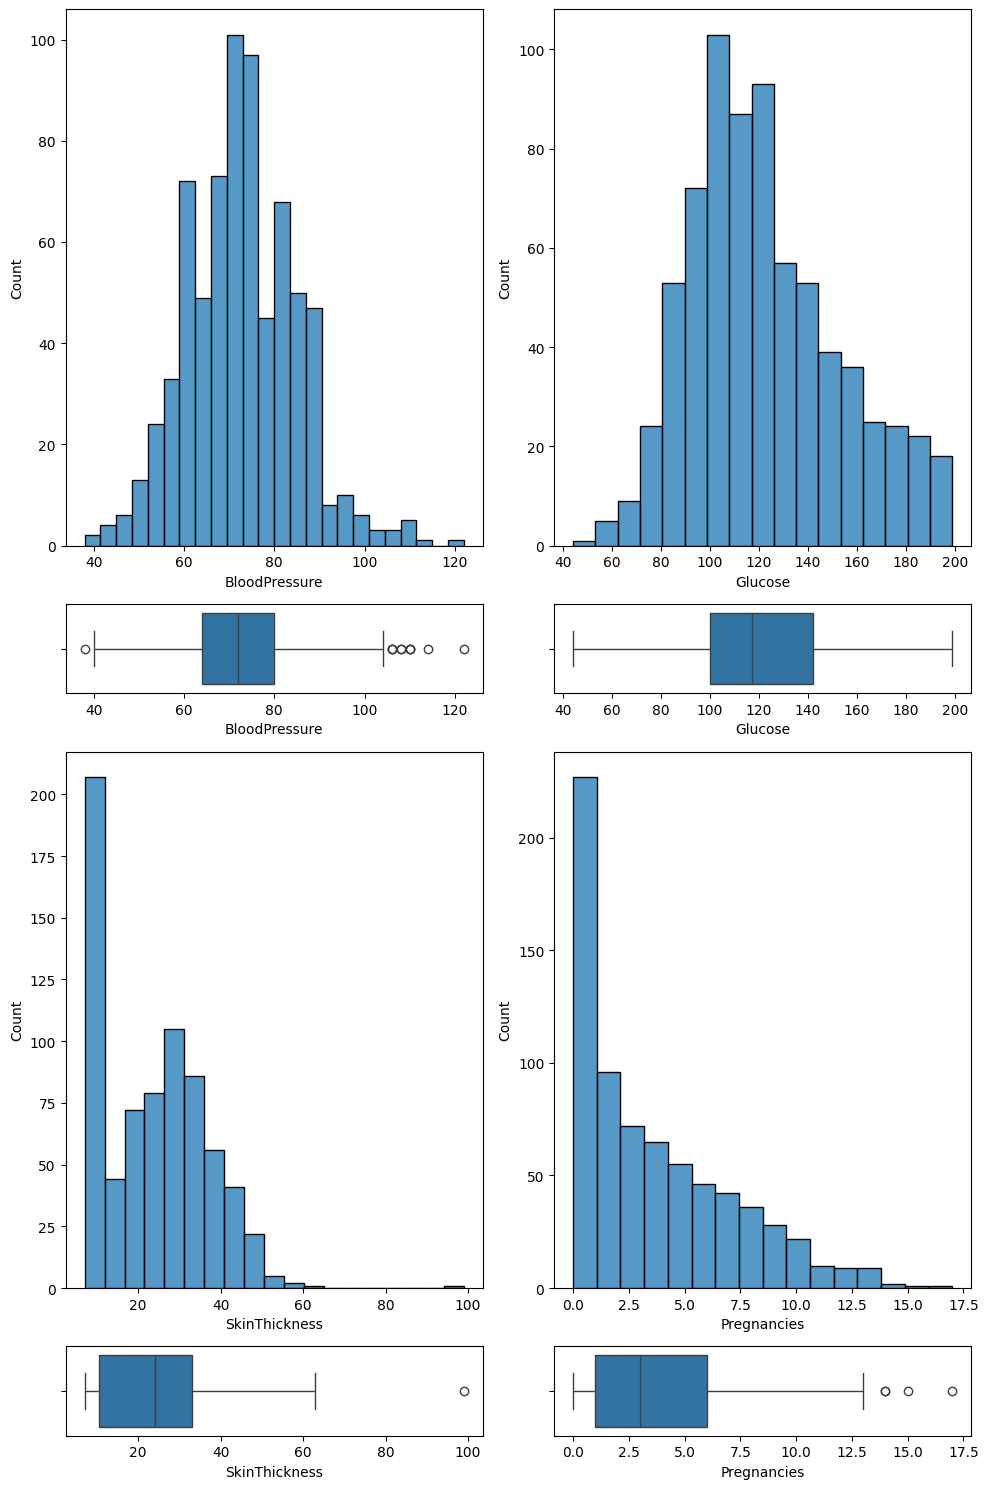

In [17]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = datosDiabetes, x = "BloodPressure")
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = datosDiabetes, x = "Glucose")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "SkinThickness")
sns.boxplot(ax = axis[3, 0], data = datosDiabetes, x = "SkinThickness")
sns.histplot(ax = axis[2, 1], data = datosDiabetes, x = "Pregnancies")
sns.boxplot(ax = axis[3, 1], data = datosDiabetes, x = "Pregnancies")

plt.tight_layout()

plt.show()

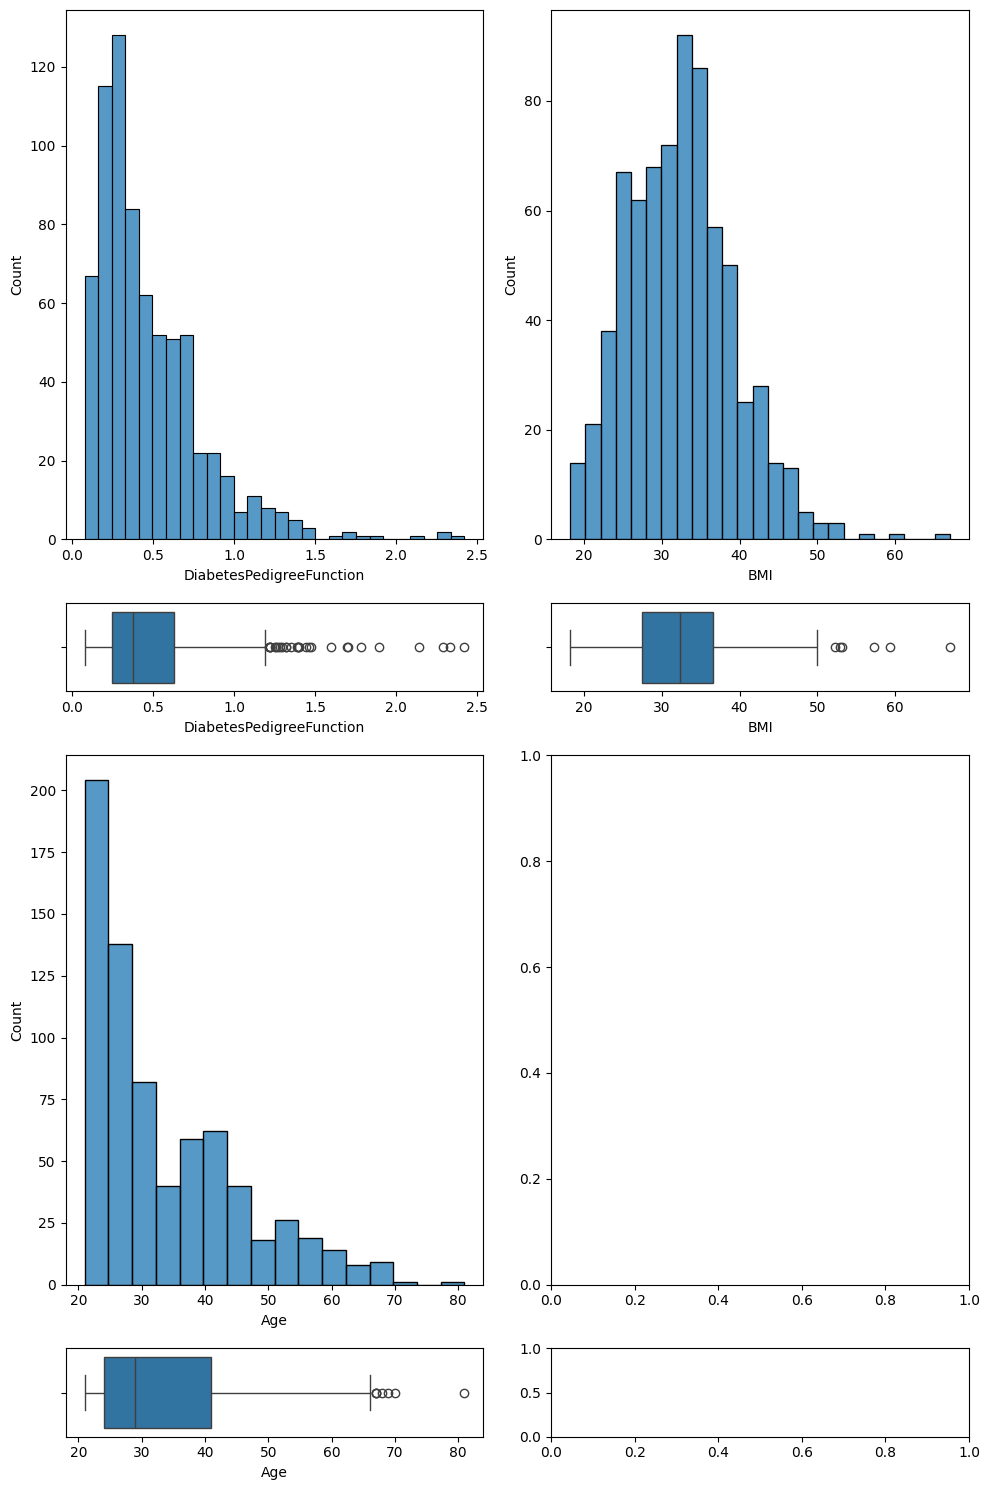

In [18]:
fig, axis = plt.subplots(4, 2, figsize = (10, 15), gridspec_kw={'height_ratios': [6, 1,6, 1]})

sns.histplot(ax = axis[0, 0], data = datosDiabetes, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[1, 0], data = datosDiabetes, x = "DiabetesPedigreeFunction")
sns.histplot(ax = axis[0, 1], data = datosDiabetes, x = "BMI")
sns.boxplot(ax = axis[1, 1], data = datosDiabetes, x = "BMI")
sns.histplot(ax = axis[2, 0], data = datosDiabetes, x = "Age")
sns.boxplot(ax = axis[3, 0], data = datosDiabetes, x = "Age")

plt.tight_layout()

plt.show()

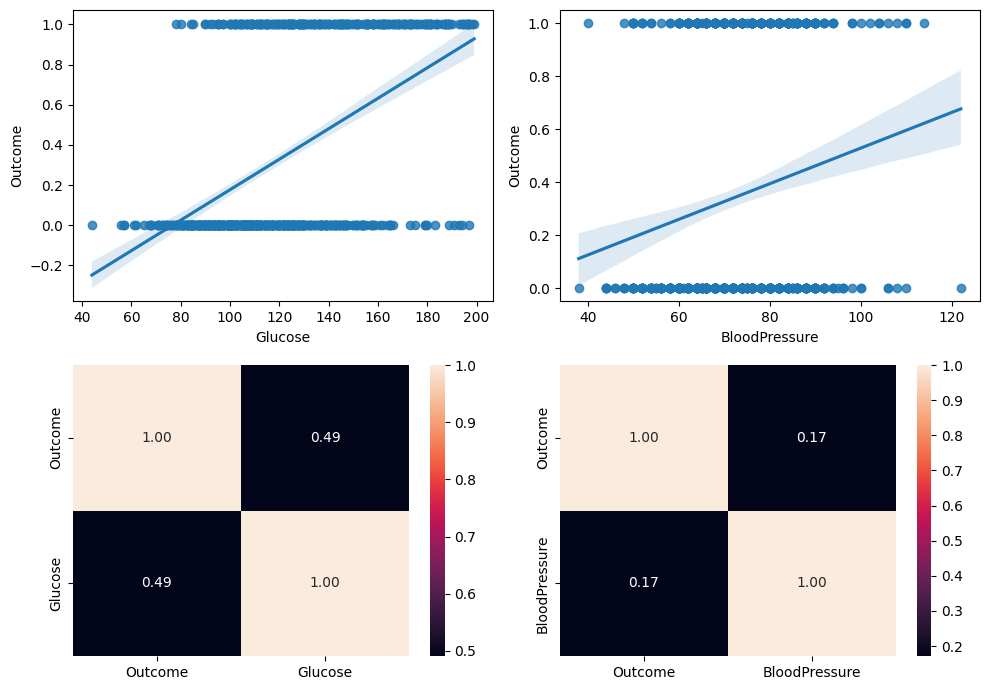

In [19]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = datosDiabetes, x = "Glucose", y = "Outcome")
sns.heatmap(datosDiabetes[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = True)

sns.regplot(ax = axis[0,1], data = datosDiabetes, x = "BloodPressure", y = "Outcome")
sns.heatmap(datosDiabetes[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = True)

plt.tight_layout()

plt.show()

In [20]:
datosDiabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Separo mis datos para empezar a normalizaros.

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

cols_a_normalizar = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
       'BMI', 'DiabetesPedigreeFunction', 'Age']

X = datosDiabetes.drop("Outcome", axis = 1)[cols_a_normalizar]
y = datosDiabetes["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train[cols_a_normalizar] = scaler.fit_transform(X_train[cols_a_normalizar])
X_test[cols_a_normalizar] = scaler.transform(X_test[cols_a_normalizar])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
481,0.000000,0.509677,0.657895,0.535714,0.412621,0.050811,0.133333
383,0.071429,0.296774,0.315789,0.196429,0.167476,0.508113,0.066667
406,0.285714,0.458065,0.447368,0.062089,0.259709,0.127242,0.416667
156,0.142857,0.354839,0.184211,0.142857,0.155340,0.238685,0.000000
227,0.214286,0.761290,0.184211,0.553571,0.461165,0.245090,0.050000


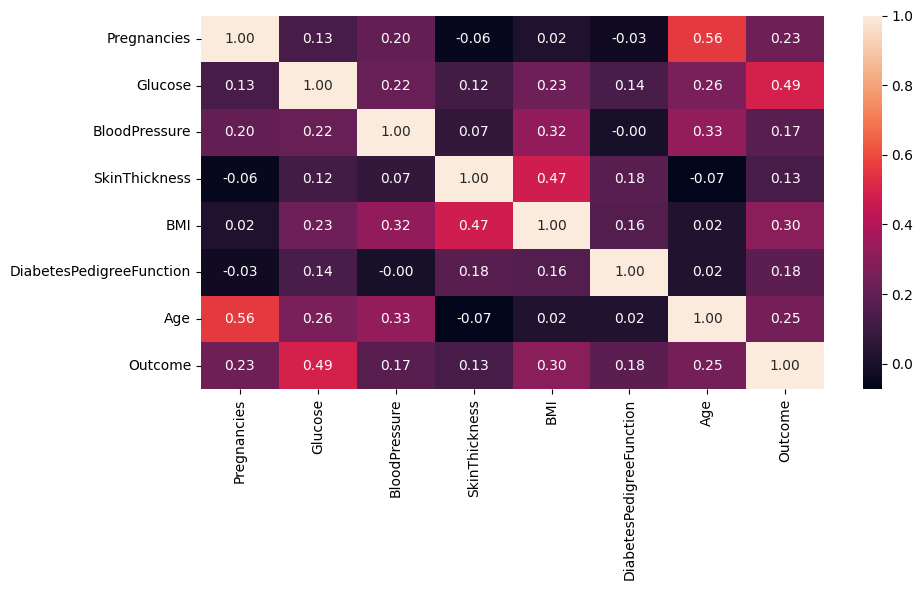

In [22]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(datosDiabetes[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
       .corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Elijo mis mejores valores.

In [23]:
X_train["Outcome"] = y_train.values
X_test["Outcome"] = y_test.values
X_train.to_csv("../data/processed/datos_train.csv", index = False)
X_test.to_csv("../data/processed/datos_test.csv", index = False)

In [24]:
train_datos = pd.read_csv("../data/processed/datos_train.csv")
test_datos = pd.read_csv("../data/processed/datos_test.csv")

train_datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.000000,0.509677,0.657895,0.535714,0.412621,0.050811,0.133333,0
1,0.071429,0.296774,0.315789,0.196429,0.167476,0.508113,0.066667,0
2,0.285714,0.458065,0.447368,0.062089,0.259709,0.127242,0.416667,1
3,0.142857,0.354839,0.184211,0.142857,0.155340,0.238685,0.000000,0
4,0.214286,0.761290,0.184211,0.553571,0.461165,0.245090,0.050000,1


Represento mi grafico 

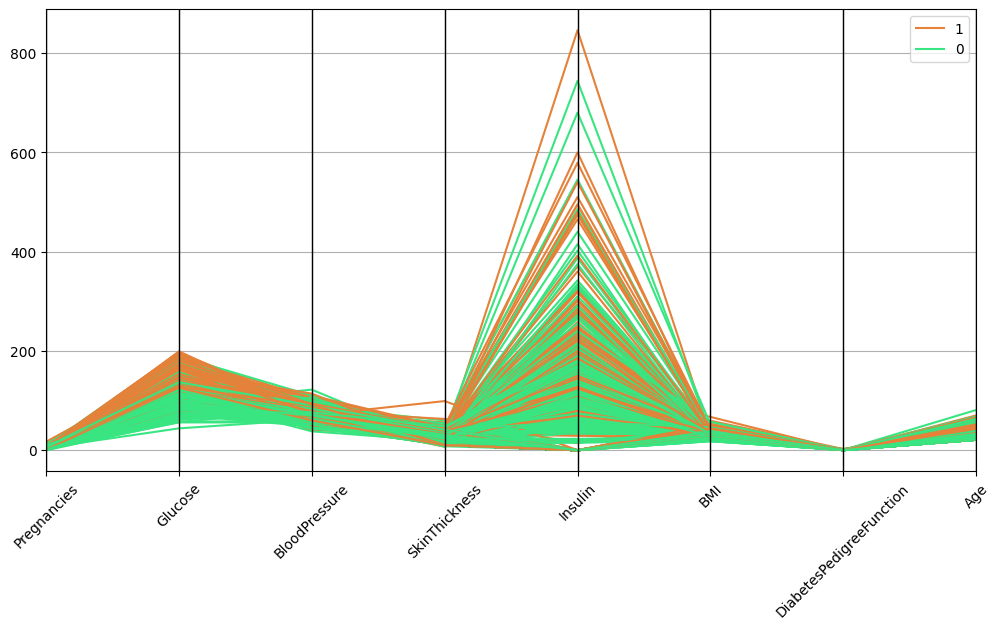

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(datosDiabetes, "Outcome", color = ("#E58139", "#39E581", "#8139E5")).tick_params(axis='x', rotation=45)

plt.show()


In [26]:
X_train = train_datos.drop(['Outcome'],axis=1)
y_train = train_datos['Outcome']
X_test =test_datos.drop(['Outcome'],axis=1)
y_test = test_datos['Outcome']

In [27]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.509677,0.657895,0.535714,0.412621,0.050811,0.133333
1,0.071429,0.296774,0.315789,0.196429,0.167476,0.508113,0.066667
2,0.285714,0.458065,0.447368,0.062089,0.259709,0.127242,0.416667
3,0.142857,0.354839,0.184211,0.142857,0.155340,0.238685,0.000000
4,0.214286,0.761290,0.184211,0.553571,0.461165,0.245090,0.050000


Usando la propiedad que busca los mejores parametros para mi arbol de decision han sido: 
    max_depth=5,    min_samples_leaf=4,    min_samples_split=2

Y mejoró mi rendimiento de datos

In [28]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    random_state = 42,
    max_depth=5,    
    min_samples_leaf=4,
    min_samples_split=2
)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

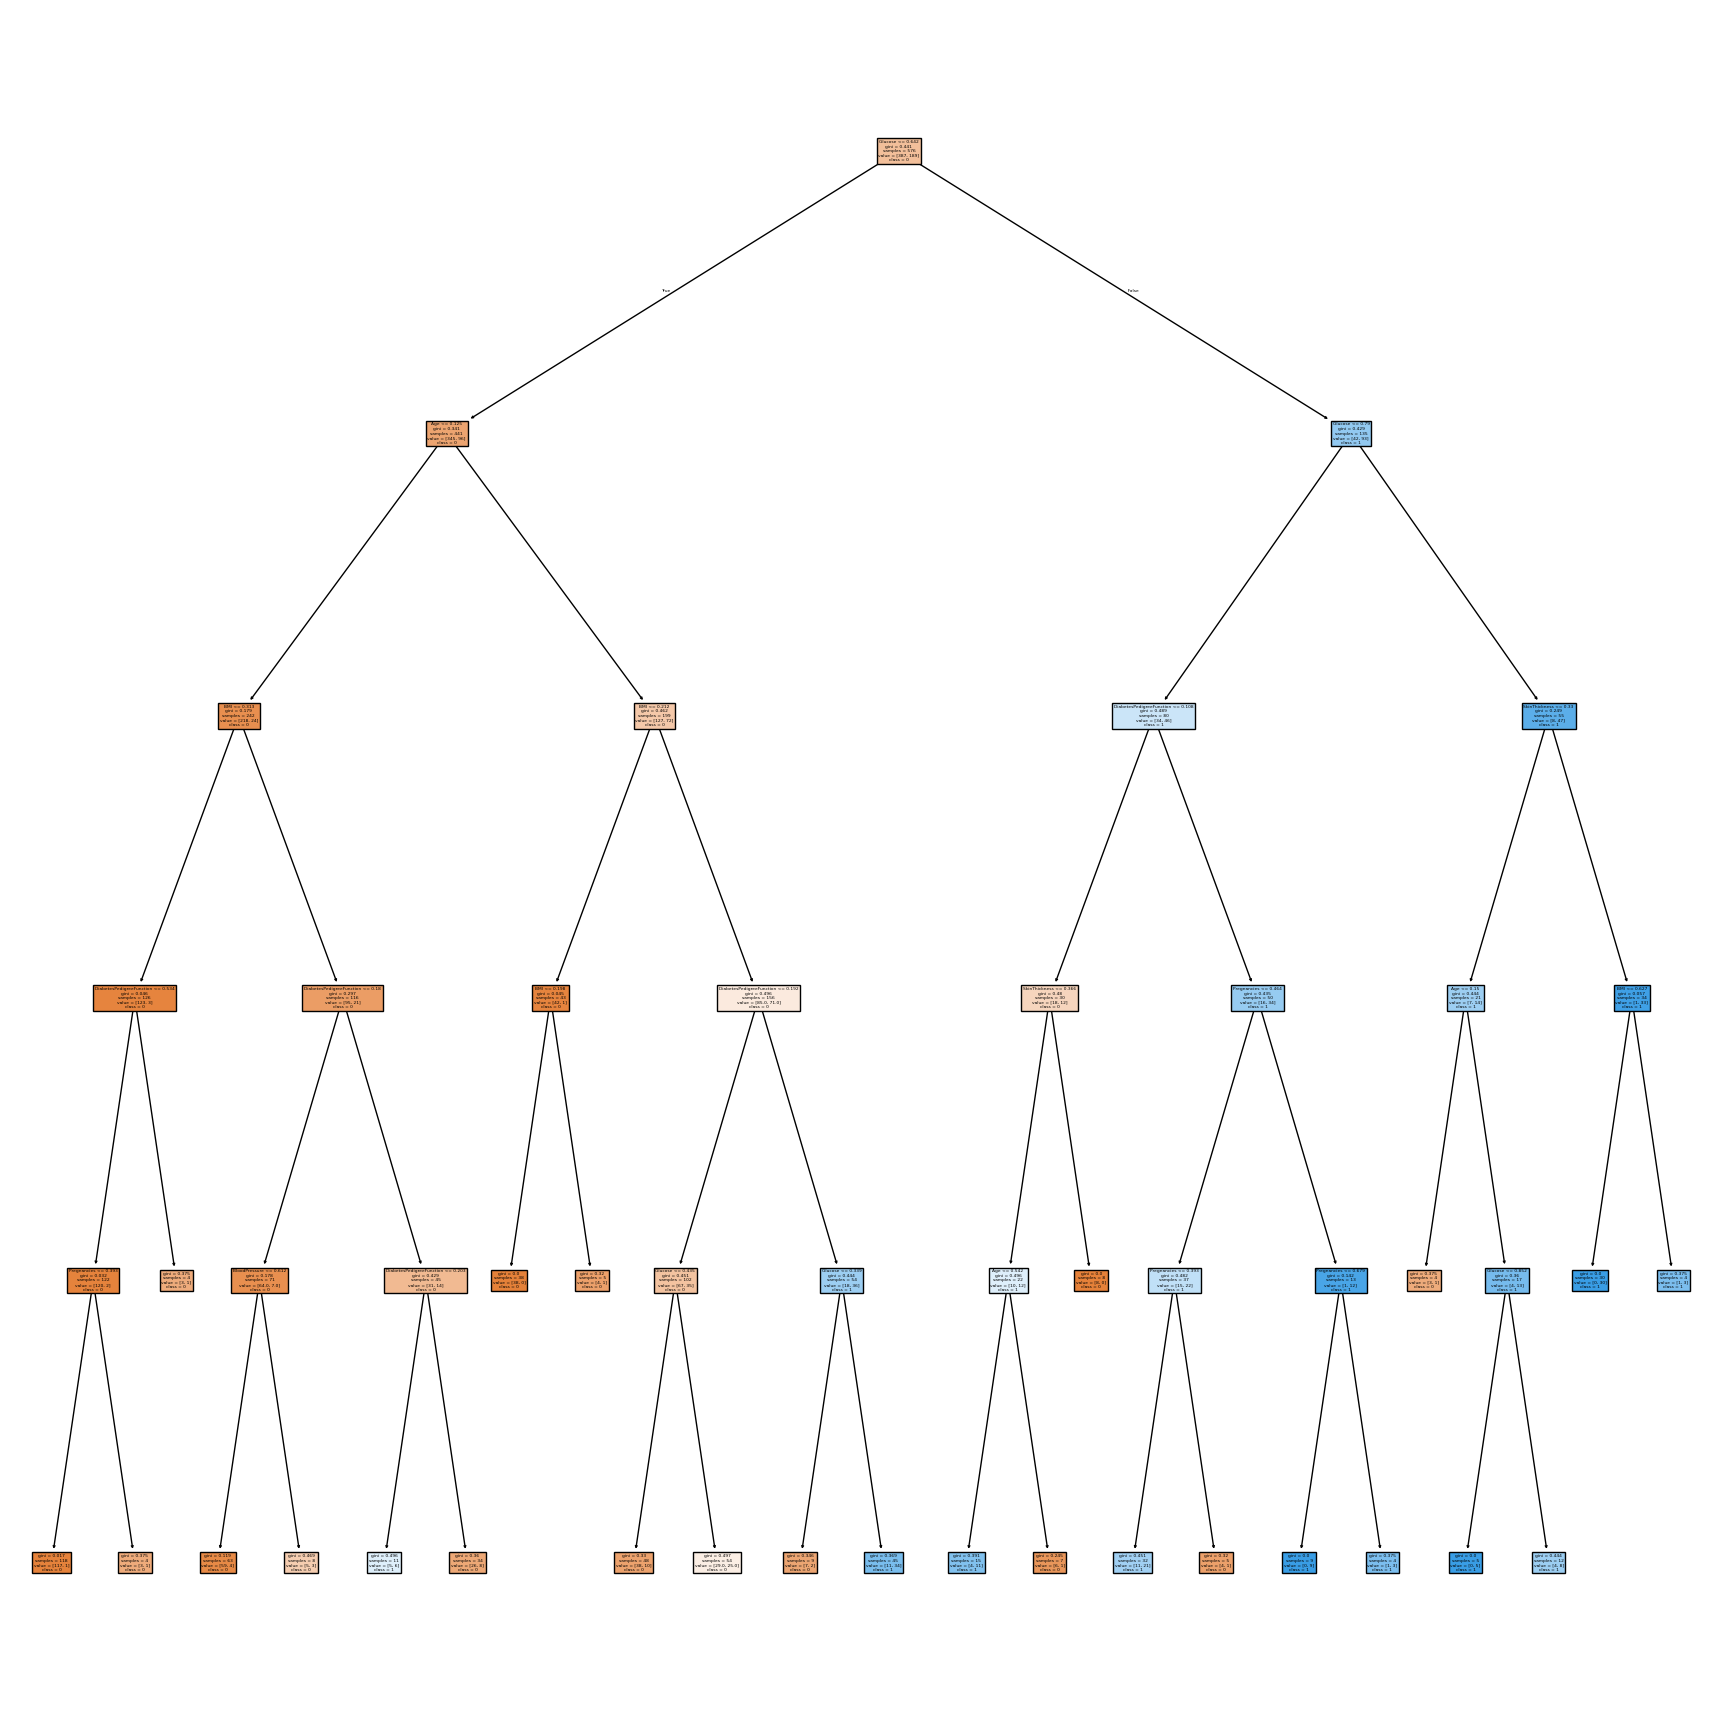

In [29]:
from sklearn import tree

fig = plt.figure(figsize=(22,22))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

Guardo mi modelo de Arbol de decision, con una profundidad maxima de 5, numero minimo de muestras por hoja de 4 y numero mino de muestras para dividir un nodo en 2

In [30]:
from pickle import dump
dump(model, open("Arbol_decision42_542.sav", "wb"))

In [31]:
from sklearn.model_selection import GridSearchCV

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=4,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [32]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [33]:
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

In [34]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print("MSE Test: ", mse_test)
print("RMSE Test: ", rmse_test)

MSE Test:  0.2689655172413793
RMSE Test:  0.5186188554626406


Haciendo multiples pruebas, me podido ver como mis datos de prueba y datos de test, se han aproximado entre ellos, los de test han bajado de 1 a 0.83 y los train han subido de 0.73

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test)
f1_score_train = f1_score(y_train, y_pred_train)

precision_test = precision_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)

recall_test = recall_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7310344827586207
F1 score Test:  0.6285714285714286
Precision Test:  0.717391304347826
Recall Test:  0.559322033898305
Accuracy Train:  0.8333333333333334
F1 score Train:  0.7303370786516854
Precision Train:  0.7784431137724551
Recall Train:  0.6878306878306878


In [37]:
from pickle import dump

dump(model, open("../models/Arbol_decision42_542.sav", "wb"))